In [1]:
import IPython.display as display
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# install pnslib
!pip install git+git://github.com/PnS2019/pnslib.git
!wget https://pns2019.github.io/images/Lenna.png

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-igmud2jn
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-igmud2jn
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489618 sha256=4f28d263542e15cf5aaafc6d6a732dd759bb87d7f0c310d7fa43072b88d52c4b
  Stored in directory: /tmp/pip-ephem-wheel-cache-t9_pkkau/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib
--2020-08-01 07:16:23--  https://pns2019.github.io/images/Lenna.png
Resolving pns2019.github.io (pns2019.github.io)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to pns2019.github.io (pns2019.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna.png’

Lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.03s   

2020-08-01 07:16:23 (13.3 MB/s) - ‘Lenna.png’ saved [473831/473831]



### Resize Image: resize_image

Resized Dimensions :  (614, 614)


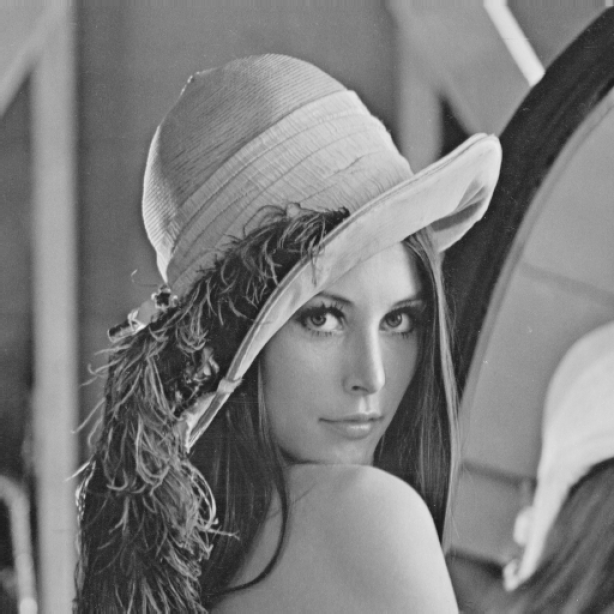

Resized Dimensions :  (512, 440)


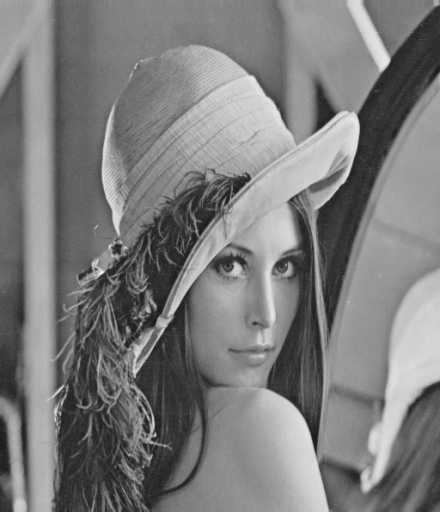

Resized Dimensions :  (440, 512)


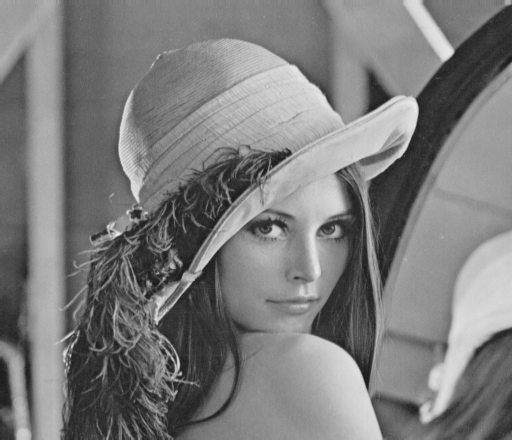

Resized Dimensions :  (450, 350)


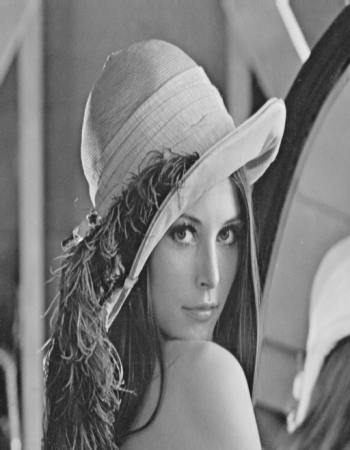

In [3]:
from google.colab.patches import cv2_imshow
import cv2
 
img = cv2.imread('/content/Lenna.png', cv2.IMREAD_UNCHANGED) 

# Upscale with resize
scale_percent = 120 # percent of original size
width_1 = int(img.shape[1] * scale_percent / 100)
height_1 = int(img.shape[0] * scale_percent / 100)
dim_1 = (width_1, height_1)

# Convert the Image to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize only width
width_2 = 440
height_2 = img.shape[0] # keep original height
dim_2 = (width_2, height_2)

# Resize only height
width_3 = img.shape[1] # keep original width
height_3 = 440
dim_3 = (width_3, height_3)

# Resize to specific width and height
width_4 = 350
height_4 = 450
dim_4 = (width_4, height_4)

dim = [dim_1, dim_2, dim_3, dim_4]

for i in range(len(dim)):
    resized = cv2.resize(gray, dim[i], interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
 
    cv2_imshow(resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### Crop Image

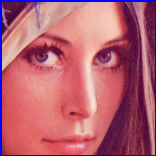

-1

In [10]:
# Importing cv2 module 
from google.colab.patches import cv2_imshow
from pnslib import utils
import cv2  

face_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_eye.xml'))

  
# bat.jpg is the batman image. 
img = cv2.imread('/content/Lenna.png')  

faces = face_cascade.detectMultiScale(img, 1.2, 5)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    new_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

crop_img = img[y:y+h, x:x+w]
  
# make sure that you have saved it in the same folder 
# You can change the kernel size as you want
cv2_imshow(crop_img)

cv2.waitKey(0) 
#cv2.destroyAllWindows()

### Padding Image: padding_image

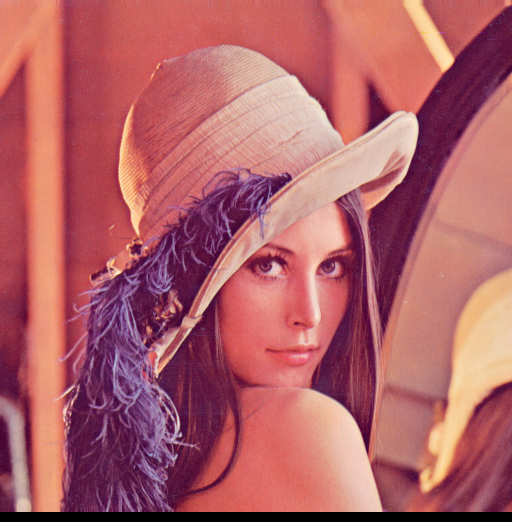

-1

In [ ]:
image_3 = cv2.copyMakeBorder( img, 0, 10, 0, 0, 0)

cv2_imshow(image_3)
cv2.waitKey(0)

### Flip Image: flip_image

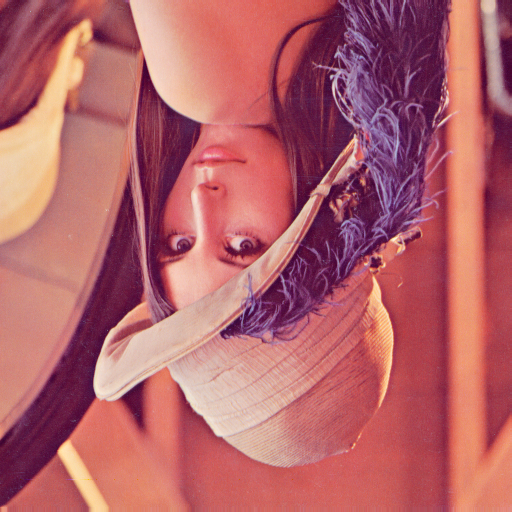

-1

In [ ]:
image_4 = cv2.flip(img, -1)

cv2_imshow(image_4)
cv2.waitKey(0)

### Superpixel Image: superpixel_image

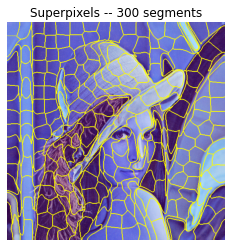

In [ ]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import cv2 as cv

# load the image and convert it to a floating point data type
img = cv2.imread('/content/Lenna.png', cv2.IMREAD_UNCHANGED)

# apply SLIC and extract (approximately) the supplied number
# of segments
segments = slic(img, n_segments = 300, sigma = 5)

# show the output of SLIC
plt.title("Superpixels -- %d segments" % (numSegments))
plt.imshow(mark_boundaries(img, segments))
plt.axis("off")

# show the plots
plt.show()


### Invert Image: invert_image

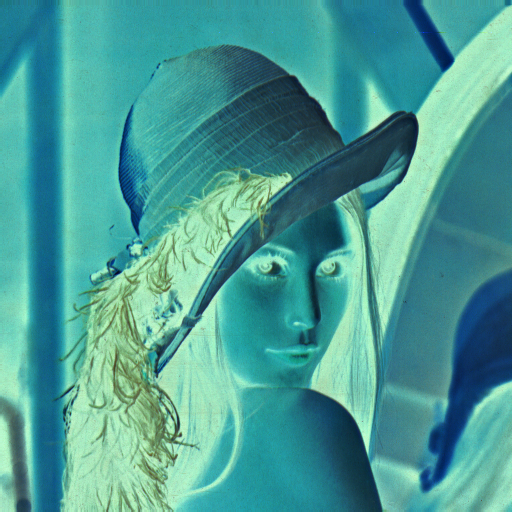

-1

In [ ]:
channel = 255
image_5 = ~img
#image_5 = cv2.bitwise_not(img)

cv2_imshow(image_5)
cv2.waitKey(0)

### Add Light: add_light

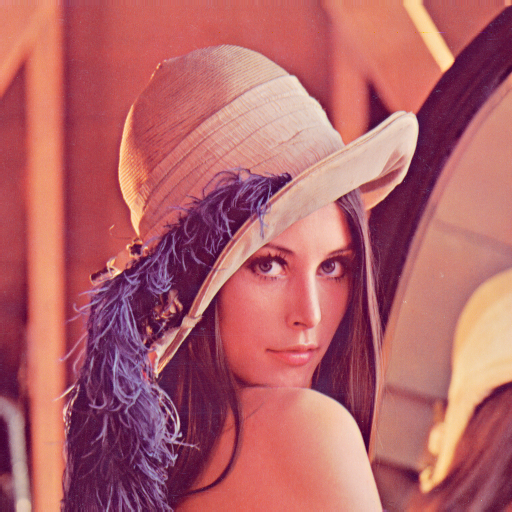

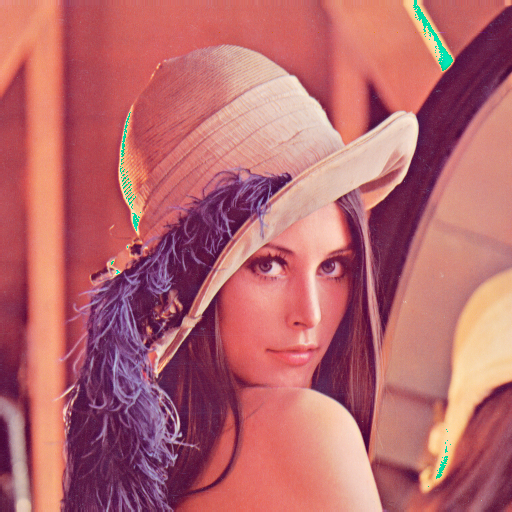

In [ ]:
a = np.double(img)

b = a + 5
img2 = np.uint8(b)
cv2_imshow(img)
cv2_imshow(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Add Light Color: add_light_color

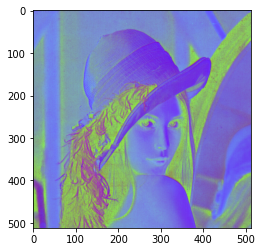

In [ ]:
nemo = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(nemo)
plt.show()

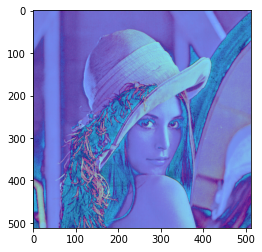

In [ ]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

plt.imshow(hsv_nemo)
plt.show()

### Saturation Image: saturation_image

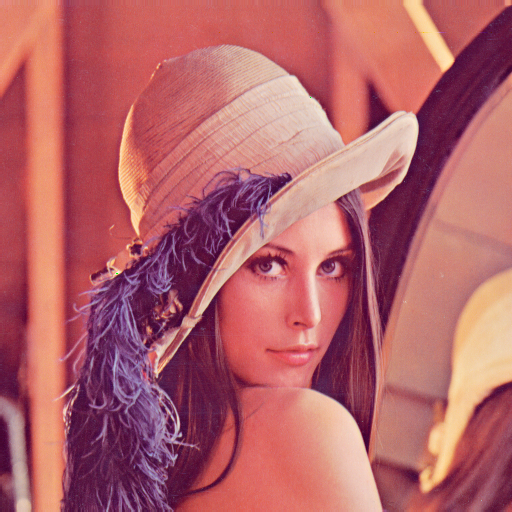

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
greenMask = cv2.inRange(hsv, (26, 10, 30), (97, 100, 255))

img[greenMask == 255] = (0, 255, 0)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Hue Image: hue_image


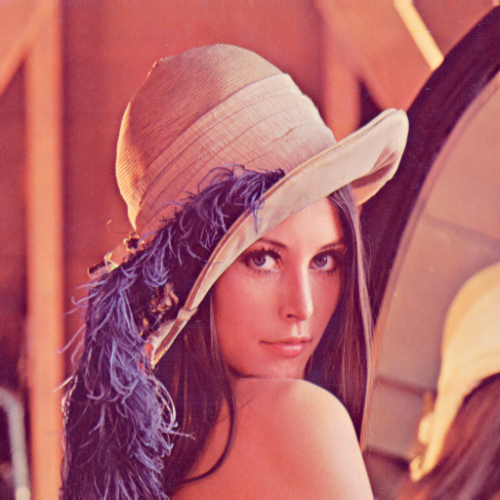

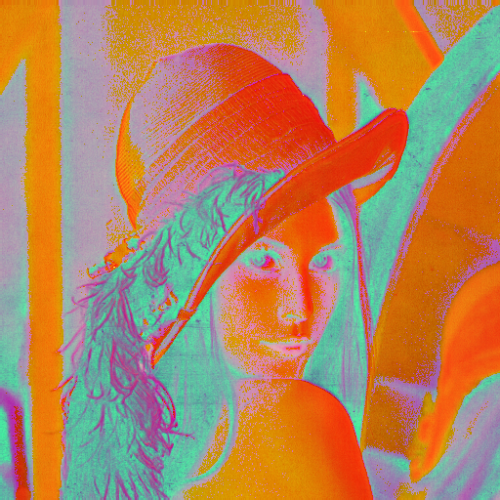

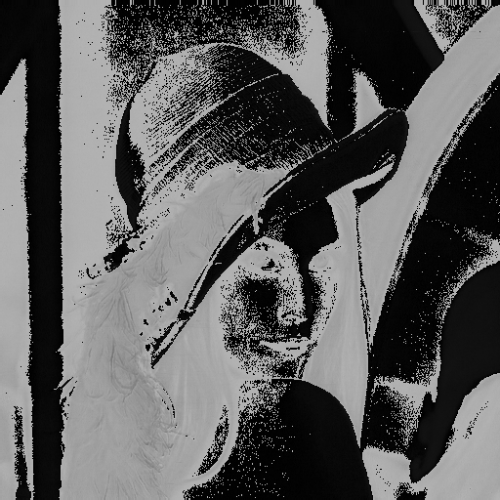

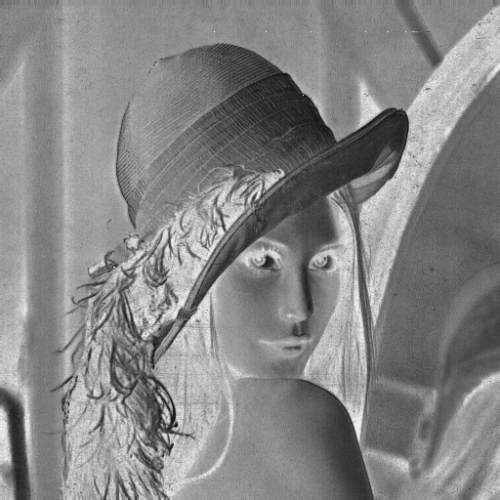

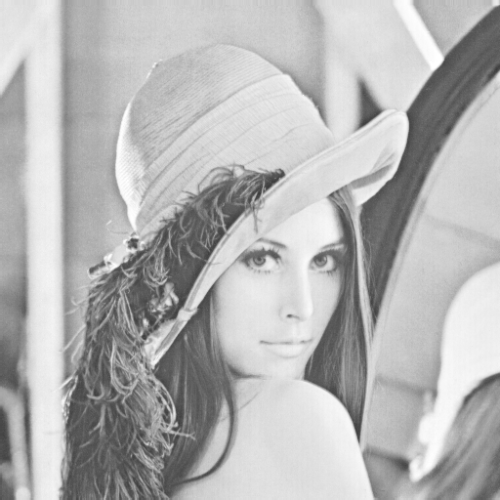

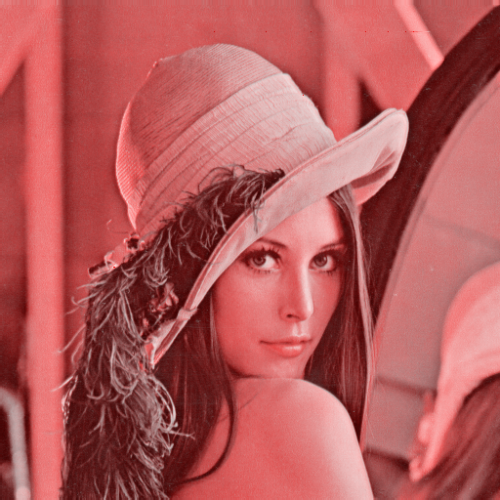

In [ ]:
def showimage(img):
    cv2_imshow(cv2.resize(img, (500,500)))
    cv2.waitKey(0)
    return 0

showimage(img)
# Convert BGR to HSV and parse HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
showimage(hsv_img)
h, s, v = hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]
showimage(h)
showimage(s)
showimage(v)

h = np.zeros_like(h)

img2 = cv2.merge((h,s,v))
img2 = cv2.cvtColor(img2, cv2.COLOR_HSV2BGR)
showimage(img2)

cv2.destroyAllWindows()